<a href="https://colab.research.google.com/github/jaewoong-87/python/blob/master/tellurium_and_antimony.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install tellurium

     |████████████████████████████████| 122kB 3.8MB/s 
     |████████████████████████████████| 2.0MB 23.2MB/s 
     |████████████████████████████████| 6.2MB 28.4MB/s 
     |████████████████████████████████| 27.4MB 151kB/s 
     |████████████████████████████████| 5.6MB 25.3MB/s 
     |████████████████████████████████| 3.2MB 40.8MB/s 
     |████████████████████████████████| 2.5MB 37.7MB/s 
     |████████████████████████████████| 3.1MB 36.6MB/s 
     |████████████████████████████████| 5.8MB 46.6MB/s 
     |████████████████████████████████| 14.9MB 340kB/s 
     |████████████████████████████████| 16.6MB 225kB/s 
     |████████████████████████████████| 36.7MB 114kB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninsta

In [6]:
import tellurium as te

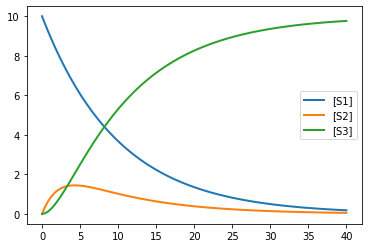

In [8]:
r= te.loada("""
    S1->S2; k1*S1;
    S2->S3; k2*S2;
    
    k1 = 0.1; k2 = 0.45;
    S1 = 10; S2 =0; S3 = 0;
    """)

#solve ODE numerically and plot
result = r.simulate(0,40,100)
r.plot(result)

te.loadAntimony / te.loada : Load and antimony model

te.loadSBML:load and SBML model

te.loadCellML: load a CellML model

In [9]:
te.setDefaultPlottingEngine('matplotlib')

model ="""
model test
     compartment C1;
     C1 = 1.0;
     species S1, S2;

     S1=10.0;
     S2=0.0;
     S1 in C1; S2 in C1;
     J1: S1 ->S2; k1*S1;

     k1 = 1.0;
end
"""
#load models
r = te.loada(model)

Running Simulations

calling the simulate function on the road runner instance r launces numerical solver.
arguments: starttime end time and number of points

optional arguments
selections: a list of variables to reduce the output eg ['time','S2']
step: the integration time steps: not to be used in combination with the number of points


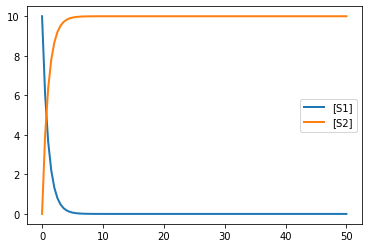

In [10]:
#simulate from 0 to 50 with 100 steps
r.simulate(0,50,100)
#plot the simulation
r.plot()

integrator and integraotr settings

set the integrator


---
set the integrator

- r.setIntegrator(<integrator-name>) or
- r.integrator = <integrator -name>
- possible values for <integrator-name>:'cvode','gillepspie' or 'rk4'
---
CVODE:
-Adaptive stepping internally, regardless of whether the output is gridded or not.
- r.integrator.<setting-name> = <value> or
- r.integrator.setValue(<setting-name>, <value>)
------------------------
selected settings for the cvode integrator:
- variable_step_size:adaptive step-size intergration(true/false)
- stiff: stiff slver for cvode only (true/false), default:true
- absolute_tolerance: absolute numerical tolerance for integrator internal stepping
- relative_tolerance: relative numerical tolerance for integrator internal stepping




In [11]:
print('the current integrator is:')
print(r.integrator)

the current integrator is:
< roadrunner.Integrator() >
  name: cvode
  settings:
      relative_tolerance: 0.000001
      absolute_tolerance: 0.000000000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: false
         max_output_rows: 100000



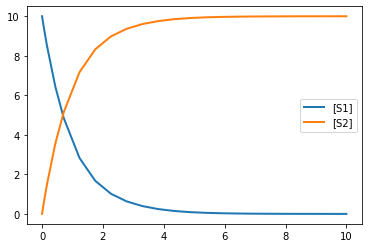

In [13]:
r.integrator.variable_step_size = True

r.integrator.absolute_tolerance = 1e-3

r.integrator.setValue('relative_tolerance', 1e-1)

r.reset()
results=r.simulate(0,10)
r.plot()

In [14]:
print('time values:')
print(results[:,0])

time values:
[0.00000000e+00 3.43225906e-07 3.43260229e-03 3.77551929e-02
 7.20777836e-02 1.60810095e-01 4.37546265e-01 7.14282434e-01
 1.23145372e+00 1.74862501e+00 2.26579629e+00 2.78296758e+00
 3.30013887e+00 3.81731015e+00 4.33448144e+00 4.85165273e+00
 5.36882401e+00 5.88599530e+00 6.40316659e+00 6.92033787e+00
 7.43750916e+00 7.95468045e+00 8.47185173e+00 9.25832855e+00
 1.00000000e+01]


In [19]:
res1 = r.simulate(start=0, end=10, points=6)
res2 = r.simulate(0.10,6)
print(res1, res2)

    time,         [S1], [S2]
 [[    0, -8.37198e-07,   10],
  [    2, -4.13487e-07,   10],
  [    4, -2.87252e-07,   10],
  [    6, -1.61016e-07,   10],
  [    8,  -6.2711e-08,   10],
  [   10, -6.08984e-08,   10]]
         time,         [S1], [S2]
 [[      0.1, -6.08984e-08,   10],
  [ 0.100203,  -6.0886e-08,   10],
  [  2.13376, -2.00708e-08,   10],
  [        6, -1.64338e-08,   10]]



In [20]:
print('floting species in model:')
print(r.getFloatingSpeciesIds())
print(r.simulate(0,10,6,
                 selections=r.getFloatingSpeciesIds()))
r.resetAll()
print(r.simulate(0,10,6, selections=['time','J1']))

floting species in model:
['S1', 'S2']
              S1, S2
 [[ -9.40718e-10, 10],
  [ -4.64615e-10, 10],
  [ -3.22771e-10, 10],
  [ -1.80926e-10, 10],
  [ -7.04652e-11, 10],
  [ -6.84285e-11, 10]]

    time,         J1
 [[    0,         10],
  [    2,    1.23775],
  [    4,   0.253289],
  [    6,  0.0444091],
  [    8, 0.00950381],
  [   10, 0.00207671]]



/usr/local/lib/python3.7/dist-packages/roadrunner/roadrunner.py:3944: UserWarning:

Simulation requested end point (10) not reached, because the maximum number of steps reached.  Possible solutions include:
  * Setting an explicit number of points (i.e. r.simulate(0, 10, 1001)
  * Setting r.integrator.variable_step_size to 'False'
* Setting 



TO reset the model's state variable use the r.reset() and 
r.reset(SelctionRecord.*) functions.
if you have made modification to parameter values, use the r.resetAll()

Modles and Model Building

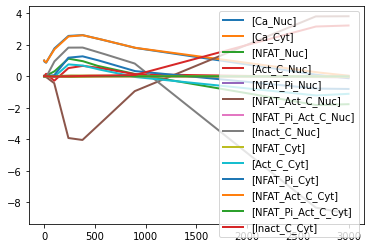

In [45]:
r= te.loadSBMLModel("https://www.ebi.ac.uk/biomodels/model/download/BIOMD0000000123.2?filename=BIOMD0000000123_url.xml")
result = r.simulate(0,3000,5000)
r.plot(result)

Non unit stoichiometires

In [26]:
r = te.loada('''
   model pathway()
    S1 + S2 -> 2 S3; k1*S1*S2
    3 S3 -> 4 S4 + 6 S5; k2*S3^3
    k1 = 0.1; k2=0.1;
    end
    ''')

print(r.getCurrentAntimony())

// Created by libAntimony v2.12.0
model *pathway()

  // Compartments and Species:
  species S1, S2, S3, S4, S5;

  // Reactions:
  _J0: S1 + S2 -> 2 S3; k1*S1*S2;
  _J1: 3 S3 -> 4 S4 + 6 S5; k2*S3^3;

  // Species initializations:
  S1 = 0;
  S2 = 0;
  S3 = 0;
  S4 = 0;
  S5 = 0;

  // Variable initializations:
  k1 = 0.1;
  k2 = 0.1;

  // Other declarations:
  const k1, k2;
end



In [38]:
feedback=te.loada('''
          model feedback()
              J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 +S1 + S4^h);
              J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
              J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
              J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
              J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);

            S1 = 0; S2 = 0; S3 = 0;
            S4 = 0; X0 = 10; X1 = 0;

            VM1= 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
          end
           ''')

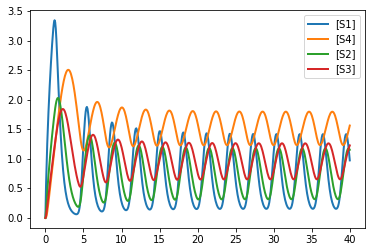

In [39]:
res=feedback.simulate(0,40,500)
feedback.plot()

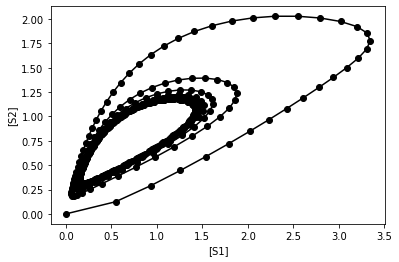

In [40]:
import matplotlib.pyplot as plt

plt.plot(res["[S1]"],
         res["[S2]"], 'o-', color="black")
plt.xlabel("[S1]")
plt.ylabel("[S2]");